# Project

## Data Cleansing

### Import data

Dataset retrived from <a href = 'https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney'>Kaggle</a>

In [5]:
import pandas as pd

df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
display(df.head())

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


Question
* How do the reviewers rate the movies?
* What movie genres are most likely to be watched by the target audience on each streaming platform?
* What movie to watch if you want to learn language based on user interested?

Spared
* What genre is released each year? -

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

### Remove unused Features

In [7]:
df = df.drop(columns=['Unnamed: 0'])

### Remove Nan

Since the instances where missing in Rotten Tomatoes are queit bad, so we drop them.

In [8]:
df[df['Rotten Tomatoes'].isnull()]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
3688,3689,Amit Tandon: Family Tandoncies,2019,NaN,NaN,NaN,1,0,0,0,0,NaN,Comedy,India,NaN,72.0
3689,3690,Wave of Cinema: Filosofi Kopi,2020,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3690,3691,Thomas & Friends: Marvelous Machinery: World o...,2020,NaN,NaN,NaN,1,0,0,0,0,Joey So,Short,NaN,English,22.0
3691,3692,ChuChuTV Bedtime Stories & Moral Stories for K...,2019,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3692,3693,Fifty Year Old Teenager,1996,NaN,NaN,NaN,1,0,0,0,0,NaN,Talk-Show,NaN,NaN,NaN
3693,3694,"Alias JJ, la celebridad del mal",2017,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3694,3695,The Vendor,2018,NaN,NaN,NaN,1,0,0,0,0,Martin Melnick,"Drama,Mystery,Thriller","United Kingdom,United States",English,24.0


In [9]:
df = df.dropna(subset=['Rotten Tomatoes'])
len(df)

9508

Removing NaN includes the reason as below.
* We assume the missing value in 'Age' column are for 'all' age.
* It's obvious the the mode is English. So, we replace with the mode.
* 'Genres', 'Directors', and 'Country' are filled with blank space. Note that all NaN in 'Country' can be assumed as 'United States' since it is the mode of this column.
* 'Runtime' are filled with the average runtime of not-NaN data in minutes format.

In [10]:
df['Age'].value_counts()

18+    2276
7+     1090
13+     998
all     698
16+     276
Name: Age, dtype: int64

In [11]:
df['Language'].value_counts()

English                                                  5650
Hindi                                                     383
Spanish                                                   209
English,Spanish                                           194
English,French                                            112
                                                         ... 
English,Greek,Arabic,Russian,Chinese,Spanish,Japanese       1
English,French,Sioux                                        1
Urdu,English,Punjabi,Bhojpuri                               1
Hindi,English,Marathi,Tamil                                 1
English,Serbo-Croatian,Russian                              1
Name: Language, Length: 813, dtype: int64

In [12]:
df['Genres'].value_counts()

Comedy                                                     779
Drama                                                      604
Documentary                                                567
Comedy,Drama                                               309
Drama,Romance                                              258
                                                          ... 
Animation,Action,Adventure,Drama,Fantasy,Thriller            1
Adventure,Comedy,Drama,Family,Western                        1
Action,Adventure,Crime,Drama                                 1
Adventure,Drama,Family,Fantasy,Music,Romance,Sci-Fi          1
Animation,Adventure,Comedy,Family,Mystery,Romance,Sport      1
Name: Genres, Length: 1418, dtype: int64

In [13]:
import numpy as np

In [14]:
df['Age'] = df['Age'].fillna('all')
df['Language'] = df['Language'].fillna('english')
df['Genres'] = df['Genres'].fillna('')
df['Directors'] = df['Directors'].fillna('-')
df['Country'] = df['Country'].fillna('-')
df['Runtime'] = df['Runtime'].fillna(np.round_(np.average(df[df['Runtime'].notna()]['Runtime']), decimals=1))

In [15]:
df[df['Genres'] == ''].head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
197,198,"Nick Kroll & John Mulaney: Oh, Hello on Broadway",2017,18+,7.7/10,78/100,1,0,0,0,0,-,,-,english,95.2
1074,1075,"Best Wishes, Warmest Regards: A Schitt's Creek...",2020,all,8.6/10,61/100,1,0,0,0,0,Amy Segal,,Canada,English,44.0
1352,1353,Bleach the Movie: Fade to Black,2008,16+,7.3/10,58/100,1,0,0,0,0,-,,-,english,95.2
1571,1572,Pretty Guardians Sailor Moon Eternal The MOVIE...,2021,all,7.1/10,56/100,1,0,0,0,0,-,,-,english,95.2
1572,1573,Tim Minchin and the Heritage Orchestra: Live a...,2011,all,8.5/10,56/100,1,0,0,0,0,-,,-,english,95.2


In [16]:
dropped_df = df.reset_index().drop(columns=['index']).copy()

In [17]:
display(dropped_df)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,-,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,9511,Most Wanted Sharks,2020,all,NaN,14/100,0,0,0,1,0,-,"Crime,Reality-TV",United States,"Greek,English",95.2
9504,9512,Doc McStuffins: The Doc Is In,2020,all,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,English,23.0
9505,9513,Ultimate Viking Sword,2019,all,NaN,13/100,0,0,0,1,0,-,,United States,english,95.2
9506,9514,Hunt for the Abominable Snowman,2011,all,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",-,english,95.2


In [18]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9508 non-null   int64  
 1   Title            9508 non-null   object 
 2   Year             9508 non-null   int64  
 3   Age              9508 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9508 non-null   int64  
 7   Hulu             9508 non-null   int64  
 8   Prime Video      9508 non-null   int64  
 9   Disney+          9508 non-null   int64  
 10  Type             9508 non-null   int64  
 11  Directors        9508 non-null   object 
 12  Genres           9508 non-null   object 
 13  Country          9508 non-null   object 
 14  Language         9508 non-null   object 
 15  Runtime          9508 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


### Change Scoring format and fix IMDb column

In [19]:
dropped_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,-,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [20]:
def remove_full(text, n):
    return text.replace(text[-n:], '')

In [21]:
dropped_df['IMDb'] = dropped_df['IMDb'].astype(str).apply(lambda text: remove_full(text, 3))
dropped_df['IMDb'] = pd.to_numeric(dropped_df['IMDb'])
dropped_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7,94/100,1,0,0,0,0,-,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [22]:
dropped_df['Rotten Tomatoes'] = dropped_df['Rotten Tomatoes'].astype(str).apply(lambda text: remove_full(text, 4))
dropped_df['Rotten Tomatoes'] = pd.to_numeric(dropped_df['Rotten Tomatoes'])
dropped_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7,94,1,0,0,0,0,-,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [23]:
dropped_df['IMDb'] = dropped_df['IMDb'].fillna(0) #0 represents not_rated

In [24]:
dropped_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7,94,1,0,0,0,0,-,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [25]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9508 non-null   int64  
 1   Title            9508 non-null   object 
 2   Year             9508 non-null   int64  
 3   Age              9508 non-null   object 
 4   IMDb             9508 non-null   float64
 5   Rotten Tomatoes  9508 non-null   int64  
 6   Netflix          9508 non-null   int64  
 7   Hulu             9508 non-null   int64  
 8   Prime Video      9508 non-null   int64  
 9   Disney+          9508 non-null   int64  
 10  Type             9508 non-null   int64  
 11  Directors        9508 non-null   object 
 12  Genres           9508 non-null   object 
 13  Country          9508 non-null   object 
 14  Language         9508 non-null   object 
 15  Runtime          9508 non-null   float64
dtypes: float64(2), int64(8), object(6)
memory usage: 1.2+ MB


### Count categoery and Lowering case in Genres and Language column

We lower all cases.

In [26]:
def lowerText(text):
  text = text.str.lower()
  return text

In [27]:
dropped_df['Genres'] = lowerText(dropped_df['Genres'])
display(dropped_df['Genres'].head())

0               biography,crime,drama
1        action,biography,drama,sport
2               documentary,biography
3                 drama,musical,sport
4    action,drama,history,romance,war
Name: Genres, dtype: object

In [28]:
dropped_df['Language'] = lowerText(dropped_df['Language'])
display(dropped_df['Language'].head())

0    english,italian,latin,spanish,german
1                           hindi,english
2                                 english
3                           hindi,english
4                                 english
Name: Language, dtype: object

Now, we count each category separated by ','

In [29]:
def splitting(dataframe, col):
    result = dataframe[col].str.get_dummies(',')
    return result

In [30]:
genres = splitting(dropped_df, 'Genres')
df_genres = pd.concat([dropped_df[['ID', 'Title']], genres], axis=1)

In [31]:
display(df_genres.head())

,ID,Title,action,adventure,animation,biography,comedy,crime,documentary,drama,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,The Irishman,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Dangal,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Roma,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [32]:
language = splitting(dropped_df, 'Language')
df_lang = pd.concat([dropped_df[['ID', 'Title']], language], axis=1)

In [33]:
display(df_lang.head())

,ID,Title,ancient (to 1453),aboriginal,afrikaans,akan,albanian,algonquin,american sign language,amharic,...,ukrainian sign language,urdu,vietnamese,washoe,welsh,wolof,xhosa,yiddish,yoruba,zulu
0,1,The Irishman,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Dangal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Roma,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Age Enocoding

In [34]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [35]:
dropped_df['Age_encode'] = enc.fit_transform(dropped_df['Age']).astype('int64')

In [36]:
enc.classes_

array(['13+', '16+', '18+', '7+', 'all'], dtype=object)

In [37]:
print(dropped_df['Age_encode'])

0       2
1       3
2       3
3       3
4       2
       ..
9503    4
9504    4
9505    4
9506    4
9507    3
Name: Age_encode, Length: 9508, dtype: int64


### Finalizing

In [38]:
display(dropped_df.head())
display(df_genres.head())
display(df_lang.head())

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Age_encode
0,1,The Irishman,2019,18+,7.8,98,1,0,0,0,0,Martin Scorsese,"biography,crime,drama",United States,"english,italian,latin,spanish,german",209.0,2
1,2,Dangal,2016,7+,8.4,97,1,0,0,0,0,Nitesh Tiwari,"action,biography,drama,sport","India,United States,United Kingdom,Australia,K...","hindi,english",161.0,3
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","documentary,biography",United Kingdom,english,83.0,3
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"drama,musical,sport","India,United Kingdom","hindi,english",224.0,3
4,5,Roma,2018,18+,7.7,94,1,0,0,0,0,-,"action,drama,history,romance,war","United Kingdom,United States",english,52.0,2


,ID,Title,action,adventure,animation,biography,comedy,crime,documentary,drama,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,The Irishman,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Dangal,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Roma,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


,ID,Title,ancient (to 1453),aboriginal,afrikaans,akan,albanian,algonquin,american sign language,amharic,...,ukrainian sign language,urdu,vietnamese,washoe,welsh,wolof,xhosa,yiddish,yoruba,zulu
0,1,The Irishman,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Dangal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Roma,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print(dropped_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9508 non-null   int64  
 1   Title            9508 non-null   object 
 2   Year             9508 non-null   int64  
 3   Age              9508 non-null   object 
 4   IMDb             9508 non-null   float64
 5   Rotten Tomatoes  9508 non-null   int64  
 6   Netflix          9508 non-null   int64  
 7   Hulu             9508 non-null   int64  
 8   Prime Video      9508 non-null   int64  
 9   Disney+          9508 non-null   int64  
 10  Type             9508 non-null   int64  
 11  Directors        9508 non-null   object 
 12  Genres           9508 non-null   object 
 13  Country          9508 non-null   object 
 14  Language         9508 non-null   object 
 15  Runtime          9508 non-null   float64
 16  Age_encode       9508 non-null   int64  
dtypes: float64(2),

In [40]:
print(df_genres.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9508 non-null   int64 
 1   Title        9508 non-null   object
 2   action       9508 non-null   int64 
 3   adventure    9508 non-null   int64 
 4   animation    9508 non-null   int64 
 5   biography    9508 non-null   int64 
 6   comedy       9508 non-null   int64 
 7   crime        9508 non-null   int64 
 8   documentary  9508 non-null   int64 
 9   drama        9508 non-null   int64 
 10  family       9508 non-null   int64 
 11  fantasy      9508 non-null   int64 
 12  film-noir    9508 non-null   int64 
 13  game-show    9508 non-null   int64 
 14  history      9508 non-null   int64 
 15  horror       9508 non-null   int64 
 16  music        9508 non-null   int64 
 17  musical      9508 non-null   int64 
 18  mystery      9508 non-null   int64 
 19  news         9508 non-null 

In [41]:
print(df_lang.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Columns: 155 entries, ID to zulu
dtypes: int64(154), object(1)
memory usage: 11.2+ MB
None


So, all data are cleaned. Now we import to csv files.

Note:\n
* Age will be encode in the list shown below.
* Genres and Age in the seperate csv files. 1 represents that genres or language appeared and 0 is not.

In [42]:
enc.classes_

array(['13+', '16+', '18+', '7+', 'all'], dtype=object)

In [43]:
# export_df = pd.DataFrame(dropped_df.copy(), index=['ID'])

In [44]:
dropped_df.to_csv('MoviesOnStreamingPlatforms_updated-Edited.csv')
df_genres.to_csv('movies_genres.csv')
df_lang.to_csv('moives_language.csv')

In [45]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9508 non-null   int64  
 1   Title            9508 non-null   object 
 2   Year             9508 non-null   int64  
 3   Age              9508 non-null   object 
 4   IMDb             9508 non-null   float64
 5   Rotten Tomatoes  9508 non-null   int64  
 6   Netflix          9508 non-null   int64  
 7   Hulu             9508 non-null   int64  
 8   Prime Video      9508 non-null   int64  
 9   Disney+          9508 non-null   int64  
 10  Type             9508 non-null   int64  
 11  Directors        9508 non-null   object 
 12  Genres           9508 non-null   object 
 13  Country          9508 non-null   object 
 14  Language         9508 non-null   object 
 15  Runtime          9508 non-null   float64
 16  Age_encode       9508 non-null   int64  
dtypes: float64(2),

## Data Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data_total = pd.read_csv('MoviesOnStreamingPlatforms_updated-Edited.csv')
data_gen = pd.read_csv('movies_genres.csv')
data_lag = pd.read_csv('moives_language.csv')

In [48]:
data_total

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Age_encode
0,0,1,The Irishman,2019,18+,7.8,98,1,0,0,0,0,Martin Scorsese,"biography,crime,drama",United States,"english,italian,latin,spanish,german",209.0,2
1,1,2,Dangal,2016,7+,8.4,97,1,0,0,0,0,Nitesh Tiwari,"action,biography,drama,sport","India,United States,United Kingdom,Australia,K...","hindi,english",161.0,3
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","documentary,biography",United Kingdom,english,83.0,3
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"drama,musical,sport","India,United Kingdom","hindi,english",224.0,3
4,4,5,Roma,2018,18+,7.7,94,1,0,0,0,0,-,"action,drama,history,romance,war","United Kingdom,United States",english,52.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,9503,9511,Most Wanted Sharks,2020,all,0.0,14,0,0,0,1,0,-,"crime,reality-tv",United States,"greek,english",95.2,4
9504,9504,9512,Doc McStuffins: The Doc Is In,2020,all,0.0,13,0,0,0,1,0,Chris Anthony Hamilton,animation,United States,english,23.0,4
9505,9505,9513,Ultimate Viking Sword,2019,all,0.0,13,0,0,0,1,0,-,NaN,United States,english,95.2,4
9506,9506,9514,Hunt for the Abominable Snowman,2011,all,0.0,10,0,0,0,1,0,Dan Oliver,"drama,history",-,english,95.2,4


In [49]:
data_gen

,Unnamed: 0,ID,Title,action,adventure,animation,biography,comedy,crime,documentary,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,0,1,The Irishman,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,Dangal,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,5,Roma,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,9503,9511,Most Wanted Sharks,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9504,9504,9512,Doc McStuffins: The Doc Is In,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9505,9505,9513,Ultimate Viking Sword,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9506,9506,9514,Hunt for the Abominable Snowman,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_t = data_total.copy()
df_g = data_gen.copy()
df_l = data_lag.copy()

In [51]:
df_g = df_g.drop(['ID'],axis=1)
df_g = df_g.drop(['Unnamed: 0'],axis=1)
#df_g = df_g.drop(['Title'],axis=1)


In [52]:
display(df_g)

,Title,action,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,The Irishman,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Roma,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,Most Wanted Sharks,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9504,Doc McStuffins: The Doc Is In,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9505,Ultimate Viking Sword,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9506,Hunt for the Abominable Snowman,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data Driven
* What is the type of genres that usually get high score from IMDB or Rotten Tomatoes?
* What movies are relate to the interest movie with Content Base Filtering?
### work
* Explain the way to investigate the question

#### Choose columns 

#### Q1
* What is the type of genres that usually get high score from IMDB or Rotten Tomatoes?

In [53]:
df_imdb = df_t['IMDb']
df_imdb =  pd.concat([df_imdb,df_g],axis =1)
df_tomato = df_t['Rotten Tomatoes']
df_tomato =  pd.concat([df_tomato,df_g],axis =1)

In [54]:
df_imdb

,IMDb,Title,action,adventure,animation,biography,comedy,crime,documentary,drama,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,7.8,The Irishman,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8.4,Dangal,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,9.0,David Attenborough: A Life on Our Planet,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8.1,Lagaan: Once Upon a Time in India,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,7.7,Roma,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,0.0,Most Wanted Sharks,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9504,0.0,Doc McStuffins: The Doc Is In,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9505,0.0,Ultimate Viking Sword,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9506,0.0,Hunt for the Abominable Snowman,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Part IMDB

In [55]:
df_imdb = df_imdb.sort_values(by=['IMDb'],ascending=False)
#clean data drop outliner
df_imdb = df_imdb[df_imdb['IMDb']>0.0]
df_imdb.reset_index(drop=True)

,IMDb,Title,action,adventure,animation,biography,comedy,crime,documentary,drama,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,9.8,Ruby's Studio: the Feelings Show,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.7,Ostatni ludzie Czarnobyla,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.6,Jingle Pols,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,9.2,Healing Voices,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,9.0,No Longer kids,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,1.6,Jonas Brothers: The Concert Experience,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9305,1.6,Terror at Bigfoot Pond,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9306,1.5,Izzie's Way Home,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9307,1.5,Aerials,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


Find the coefficient of variance in IMDb score.

In [56]:
mean_imdb = np.mean(df_imdb['IMDb'])
sd_imdb = np.std(df_imdb['IMDb'])
cov_imdb = (sd_imdb/mean_imdb)*100 
print(cov_imdb,'%')

18.899475945518933 %


In [57]:
#we defind the high score is persentile 80 
df_imdb_per80 = np.percentile(df_imdb['IMDb'], 80)
print(df_imdb_per80) 

7.2


In [58]:
get_imdb = df_imdb[df_imdb['IMDb']>=df_imdb_per80]
get_imdb1 = get_imdb.sum()[2:]
rank_imdb = get_imdb1.sort_values(ascending = False)[:5]
print(rank_imdb)

drama          850
comedy         610
documentary    524
family         259
romance        254
dtype: object


#### Part Tomato

In [59]:
df_tomato = df_tomato.sort_values(by=['Rotten Tomatoes'],ascending=False)

In [60]:
df_tomato['Rotten Tomatoes'].unique()

array([98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82,
       81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65,
       64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48,
       47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31,
       30, 29, 28, 27, 26, 24, 23, 21, 20, 19, 17, 16, 15, 14, 13, 12, 10],
      dtype=int64)

Find the coefficient of variance in Rotten Tomatoes score.

In [61]:
mean_tomato = np.mean(df_tomato['Rotten Tomatoes'])
sd_tomato = np.std(df_tomato['Rotten Tomatoes'])
cov_tomato = (sd_tomato/mean_tomato)*100 
print(cov_tomato,'%')

24.64651320849978 %


In [62]:
#we defind the high score is persentile 80 
df_tomato_per80 = np.percentile(df_tomato['Rotten Tomatoes'], 80)
print(df_tomato_per80 ) 

65.0


In [63]:
get_toma = df_tomato[df_tomato['Rotten Tomatoes']>=df_tomato_per80]
get_toma1 = get_toma.sum()[2:]
rank_tomato = get_toma1.sort_values(ascending = False)[:5]
print(rank_tomato)

drama        1013
comedy        689
thriller      512
action        429
adventure     417
dtype: object


#### Data Visualixation

In [64]:
import seaborn as sns

<AxesSubplot:xlabel='IMDb'>

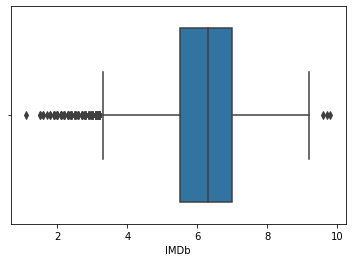

In [65]:
sns.boxplot(x=df_imdb['IMDb'])

<AxesSubplot:xlabel='Rotten Tomatoes'>

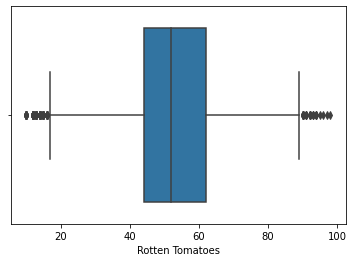

In [66]:
sns.boxplot(x=df_tomato['Rotten Tomatoes'])

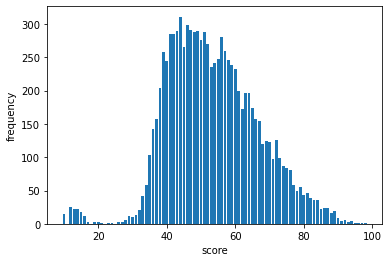

In [67]:
bar = dict(df_tomato['Rotten Tomatoes'].value_counts())
plt.bar(bar.keys(), bar.values(), width = 0.8)
plt.xlabel('score')
plt.ylabel('frequency')
plt.savefig('Tomato.png')
plt.show()

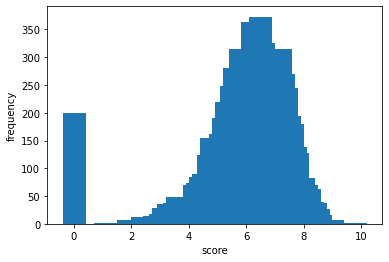

In [68]:
bar = dict(df_t['IMDb'].value_counts())
plt.bar(bar.keys(), bar.values(), width = 0.8)
plt.xlabel('score')
plt.ylabel('frequency')
plt.savefig('IMDB.png')
plt.show()

#### Q2

In [69]:
import pandas as pd
import numpy as np
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
genre = pd.read_csv("movies_genres.csv")

In [70]:
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,0,NaN,"Crime,Reality-TV",United States,"Greek,English",NaN
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,English,23.0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,0,NaN,NaN,United States,NaN,NaN
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",NaN,NaN,NaN


#### Cleaning

In [71]:
df['Age'] = df['Age'].fillna('all')
df['Language'] = df['Language'].fillna('english')
df['Genres'] = df['Genres'].fillna('')
df['Directors'] = df['Directors'].fillna('')
df['Country'] = df['Country'].fillna('')
df['Runtime'] = df['Runtime'].fillna(np.round_(np.average(df[df['Runtime'].notna()]['Runtime']), decimals=1))

In [72]:
#แปลง เป็น float 64
def remove_full(text, n):
    return text.replace(text[-n:], '')


In [73]:
df['IMDb'] = df['IMDb'].astype(str).apply(lambda text: remove_full(text, 3))
df['IMDb'] = pd.to_numeric(df['IMDb'])
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7,94/100,1,0,0,0,0,,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [74]:
df['IMDb'] = df['IMDb'].fillna(0) #0 represents not_rated

In [75]:
df = df.dropna().copy()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9508 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9508 non-null   int64  
 1   ID               9508 non-null   int64  
 2   Title            9508 non-null   object 
 3   Year             9508 non-null   int64  
 4   Age              9508 non-null   object 
 5   IMDb             9508 non-null   float64
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9508 non-null   int64  
 8   Hulu             9508 non-null   int64  
 9   Prime Video      9508 non-null   int64  
 10  Disney+          9508 non-null   int64  
 11  Type             9508 non-null   int64  
 12  Directors        9508 non-null   object 
 13  Genres           9508 non-null   object 
 14  Country          9508 non-null   object 
 15  Language         9508 non-null   object 
 16  Runtime          9508 non-null   float64
dtypes: float64(2),

In [77]:
#AttributeError: 'float' object has no attribute 'replace'
df['IMDb'] = df['IMDb'].astype(str)
df['Age'] = df['Age'].astype(str)

In [78]:
use = ['Title','IMDb','Directors','Genres','Language']
new = df[use]
new.head()

,Title,IMDb,Directors,Genres,Language
0,The Irishman,7.8,Martin Scorsese,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German"
1,Dangal,8.4,Nitesh Tiwari,"Action,Biography,Drama,Sport","Hindi,English"
2,David Attenborough: A Life on Our Planet,9.0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",English
3,Lagaan: Once Upon a Time in India,8.1,Ashutosh Gowariker,"Drama,Musical,Sport","Hindi,English"
4,Roma,7.7,,"Action,Drama,History,Romance,War",English


#### Content Base

In [79]:
new['combine'] = new['Directors'] + ' ' + new['Genres'] + ' '  + new['Language']
new = new.drop(['Genres','Directors','Language'],axis=1)
new.head()

<ipython-input-79-2f8f2140f917>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['combine'] = new['Directors'] + ' ' + new['Genres'] + ' '  + new['Language']


,Title,IMDb,combine
0,The Irishman,7.8,"Martin Scorsese Biography,Crime,Drama English,..."
1,Dangal,8.4,"Nitesh Tiwari Action,Biography,Drama,Sport Hin..."
2,David Attenborough: A Life on Our Planet,9.0,"Alastair Fothergill,Jonathan Hughes,Keith Scho..."
3,Lagaan: Once Upon a Time in India,8.1,"Ashutosh Gowariker Drama,Musical,Sport Hindi,E..."
4,Roma,7.7,"Action,Drama,History,Romance,War English"


#### Filtering agorithm

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(stop_words='english')
count_vect = cv.fit_transform(new['combine'])
cosim = cosine_similarity(count_vect, count_vect)

In [81]:
cosim

array([[1.        , 0.3354102 , 0.21081851, ..., 0.31622777, 0.28284271,
        0.15811388],
       [0.3354102 , 1.        , 0.23570226, ..., 0.35355339, 0.31622777,
        0.1767767 ],
       [0.21081851, 0.23570226, 1.        , ..., 0.33333333, 0.1490712 ,
        0.33333333],
       ...,
       [0.31622777, 0.35355339, 0.33333333, ..., 1.        , 0.4472136 ,
        0.5       ],
       [0.28284271, 0.31622777, 0.1490712 , ..., 0.4472136 , 1.        ,
        0.2236068 ],
       [0.15811388, 0.1767767 , 0.33333333, ..., 0.5       , 0.2236068 ,
        1.        ]])

In [82]:
mapping = pd.Series(df.index, index = new["Title"])
mapping

Title
The Irishman                                   0
Dangal                                         1
David Attenborough: A Life on Our Planet       2
Lagaan: Once Upon a Time in India              3
Roma                                           4
                                            ... 
Most Wanted Sharks                          9510
Doc McStuffins: The Doc Is In               9511
Ultimate Viking Sword                       9512
Hunt for the Abominable Snowman             9513
Women of Impact: Changing the World         9514
Length: 9508, dtype: int64

In [83]:
new = new.reset_index()
indices = pd.Series(new.index, index =new['Title'])

#### Recommending system
Input: Title of a Movie

Output: Similar movies sorted on Directors, Genre , language 

In [84]:
import numpy as np
def get_recom(t, cosim=cosim):
    t=t.replace(' ','')
    i = indices[t]
    s_scores = list(enumerate(cosim[i]))
    s_scores = sorted(s_scores, key=lambda x: x[1], reverse=True)
    s_scores = s_scores[1:11]
    mov_idx = [j[0] for j in s_scores]
    
    l = []
    for i in mov_idx:
        Platform = []
        l.append(df['Title'].iloc[i])
        l.append(df['IMDb'].iloc[i])
        l.append(df['Directors'].iloc[i])
        l.append(df['Genres'].iloc[i])
        if df['Netflix'].iloc[i]==1:
            Platform.append("Netflix")
        if df['Prime Video'].iloc[i]==1:
            Platform.append("Prime Videos")
        if df["Hulu"].iloc[i]==1:
            Platform.append("Hulu")
        if df["Disney+"].iloc[i]==1:
            Platform.append("Disney+")
        pl = ', '.join(map(str,Platform))
        l.append(pl)
    
    l = np.array(l)
    l = l.reshape(10,5)
    
    
    cols = ['Title', 'IMDb Rating', 'Directors', 'Genre', 'Platform']
    
    l = pd.DataFrame(data=l, columns = cols)
    return l

In [85]:
x = 'Roma'
print("Recommend a movie similar to ", x )
get_recom(x)

Recommend a movie similar to  Roma


,Title,IMDb Rating,Directors,Genre,Platform
0,Sands of Iwo Jima,7.1,Allan Dwan,"Action,Drama,Romance,War",Prime Videos
1,Memorial Day,6.1,Samuel Fischer,"Action,Drama,History,War",Prime Videos
2,Hearts in Bondage,5.5,Lew Ayres,"Drama,History,Romance,War",Prime Videos
3,Les Misérables,7.6,Tom Hooper,"Drama,History,Musical,Romance,War","Netflix, Prime Videos"
4,The Patriot,7.2,Roland Emmerich,"Action,Drama,History,War",Netflix
5,Alexander,5.6,Oliver Stone,"Action,Biography,Drama,History,War",Netflix
6,Black Gold,6.7,Jean-Jacques Annaud,"Action,Drama,History,War","Prime Videos, Hulu"
7,15 Minutes of War,6.3,Fred Grivois,"Action,Drama,History,War",Prime Videos
8,Kingdom of Conquerors,5.7,Ping Wang,"Action,Drama,History,War",Prime Videos
9,The Odyssey of Destiny,5.0,Brent Hoover,"Action,Adventure,Drama,Romance,War",Prime Videos


In [86]:
get_recom('Sultan',cosim)

,Title,IMDb Rating,Directors,Genre,Platform
0,Bharat,4.9,Ali Abbas Zafar,"Action,Comedy,Drama",Prime Videos
1,Tiger Zinda Hai,5.9,Ali Abbas Zafar,"Action,Adventure,Thriller",Prime Videos
2,Mere Brother Ki Dulhan,5.8,Ali Abbas Zafar,"Comedy,Drama,Family,Romance",Prime Videos
3,Gunday,2.4,Ali Abbas Zafar,"Action,Drama,Musical,Romance",Prime Videos
4,Dangal,8.4,Nitesh Tiwari,"Action,Biography,Drama,Sport",Netflix
5,Soorma,7.4,Shaad Ali,"Biography,Drama,Sport",Netflix
6,Never Back Down,6.6,Jeff Wadlow,"Action,Drama,Sport",Netflix
7,Initial D,6.4,,"Animation,Action,Comedy,Drama,Sport",Netflix
8,Best of the Best,6.4,Robert Radler,"Action,Drama,Sport",Netflix
9,Dhan Dhana Dhan Goal,5.0,Vivek Agnihotri,"Drama,Sport",Netflix
